In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Score.csv")
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.000,7.000,4.000,26.823,265.000,No,80.415,312.494,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
1,3.000,7.000,4.000,31.945,265.000,No,118.280,284.629,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
2,3.000,7.000,4.000,28.609,267.000,No,81.700,331.210,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
3,5.000,4.000,4.000,31.378,268.000,No,199.458,223.451,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
4,6.000,4.000,4.000,24.797,269.000,No,41.420,341.489,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575


In [ ]:
df = pd.read_csv("Score.csv")
df

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.000,7.000,4.000,26.823,265.000,No,80.415,312.494,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
1,3.000,7.000,4.000,31.945,265.000,No,118.280,284.629,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
2,3.000,7.000,4.000,28.609,267.000,No,81.700,331.210,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
3,5.000,4.000,4.000,31.378,268.000,No,199.458,223.451,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
4,6.000,4.000,4.000,24.797,269.000,No,41.420,341.489,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99955,23.000,7.000,3.000,34.664,378.000,No,60.971,479.866,Poor,Good,...,25.000,39628.990,4.000,6.000,7.000,2.000,3359.416,11.500,502.380,35.104
99956,18.000,7.000,3.000,40.566,379.000,No,54.186,496.652,Poor,Good,...,25.000,39628.990,4.000,6.000,7.000,2.000,3359.416,11.500,502.380,35.104
99957,27.000,6.000,3.000,41.256,380.000,No,24.028,516.809,Poor,Good,...,25.000,39628.990,4.000,6.000,7.000,2.000,3359.416,11.500,502.380,35.104
99958,20.000,6.000,3.000,33.638,381.000,No,251.673,319.165,Standard,Good,...,25.000,39628.990,4.000,6.000,7.000,2.000,3359.416,11.500,502.380,35.104


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       99960 non-null  float64
 1   Num_of_Delayed_Payment    99960 non-null  float64
 2   Num_Credit_Inquiries      99960 non-null  float64
 3   Credit_Utilization_Ratio  99960 non-null  float64
 4   Credit_History_Age        99960 non-null  float64
 5   Payment_of_Min_Amount     99960 non-null  object 
 6   Amount_invested_monthly   99960 non-null  float64
 7   Monthly_Balance           99960 non-null  float64
 8   Credit_Score              99960 non-null  object 
 9   Credit_Mix                99960 non-null  object 
 10  Payment_Behaviour         99960 non-null  object 
 11  Age                       99960 non-null  float64
 12  Annual_Income             99960 non-null  float64
 13  Num_Bank_Accounts         99960 non-null  float64
 14  Num_Cr

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Delay_from_due_date         0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Credit_Mix                  0
Payment_Behaviour           0
Age                         0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Monthly_Inhand_Salary       0
Changed_Credit_Limit        0
Outstanding_Debt            0
Total_EMI_per_month         0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delay_from_due_date,99960.000,21.096,14.827,0.000,10.000,18.000,28.000,67.000
Num_of_Delayed_Payment,99960.000,13.336,6.270,0.000,9.000,14.000,18.000,28.000
Num_Credit_Inquiries,99960.000,5.775,3.862,0.000,3.000,5.000,8.000,29.000
Credit_Utilization_Ratio,99960.000,32.285,5.117,20.000,28.052,32.305,36.496,50.000
Credit_History_Age,99960.000,221.123,99.696,1.000,144.000,219.000,302.000,404.000
Amount_invested_monthly,99960.000,193.665,194.783,0.000,73.709,129.342,234.324,1977.326
Monthly_Balance,99960.000,403.445,214.387,0.008,270.317,337.238,471.905,1602.041
Age,99960.000,33.269,10.762,14.000,24.000,33.000,42.000,56.000
Annual_Income,99960.000,50498.704,38294.243,7005.930,19338.480,36996.830,71681.400,179987.280
Num_Bank_Accounts,99960.000,5.369,2.592,0.000,3.000,5.000,7.000,10.000


In [ ]:
df.Credit_Mix.unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [ ]:
df.Credit_Score.unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [ ]:
df.Payment_Behaviour.unique()

array(['High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [ ]:
df.Payment_of_Min_Amount.value_counts()

Yes    52326
No     35628
NM     12006
Name: Payment_of_Min_Amount, dtype: int64

In [ ]:
df2=df[["Credit_Mix","Credit_Score"]]
df2

,Credit_Mix,Credit_Score
0,Good,Good
1,Good,Good
2,Good,Good
3,Good,Good
4,Good,Good
...,...,...
99955,Good,Poor
99956,Good,Poor
99957,Good,Poor
99958,Good,Standard


In [ ]:
def jaccard_similarity(set1, set2):
    intersection = len(set(set1) & set(set2))
    union = len(set(set1) | set(set2))
    return intersection / union

similarity_percentage = jaccard_similarity(df['Credit_Score'], df['Credit_Mix']) * 100

In [ ]:
jaccard_similarity(df.Credit_Score, df.Credit_Mix)

0.5

In [ ]:
df.describe(include=object).T

,count,unique,top,freq
Payment_of_Min_Amount,99960,3,Yes,52326
Credit_Score,99960,3,Standard,53149
Credit_Mix,99960,3,Standard,45832
Payment_Behaviour,99960,6,Low_spent_Small_value_payments,33912


<Axes: >

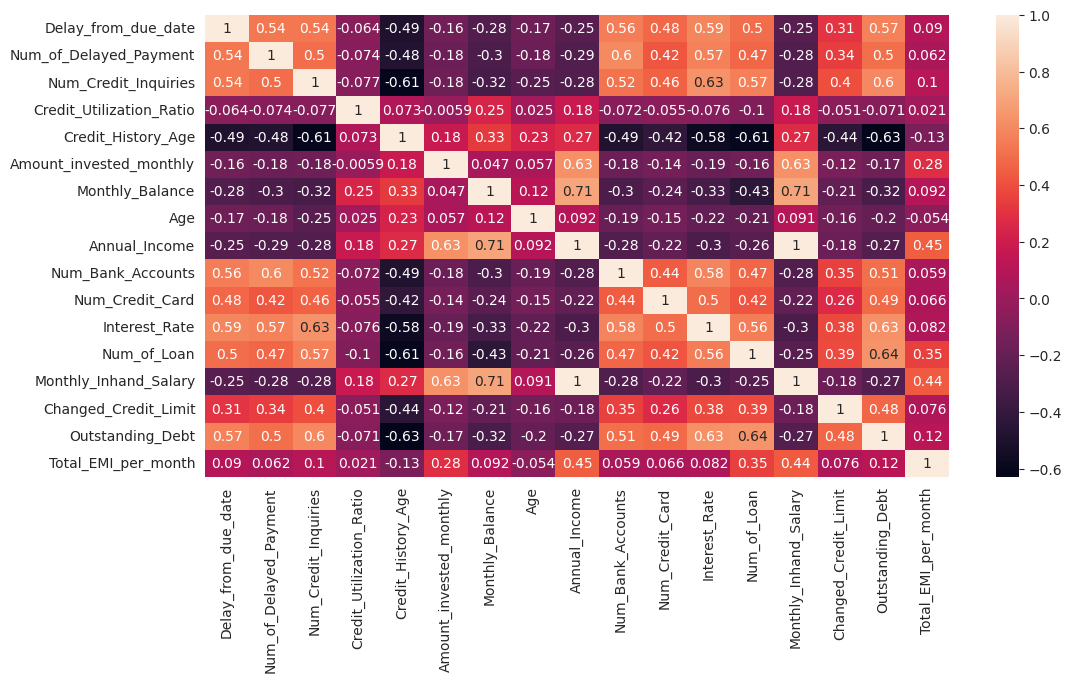

In [ ]:
sns.heatmap(df.corr(), annot=True)


In [ ]:
df_e=df.copy()


In [ ]:
#df = df_e

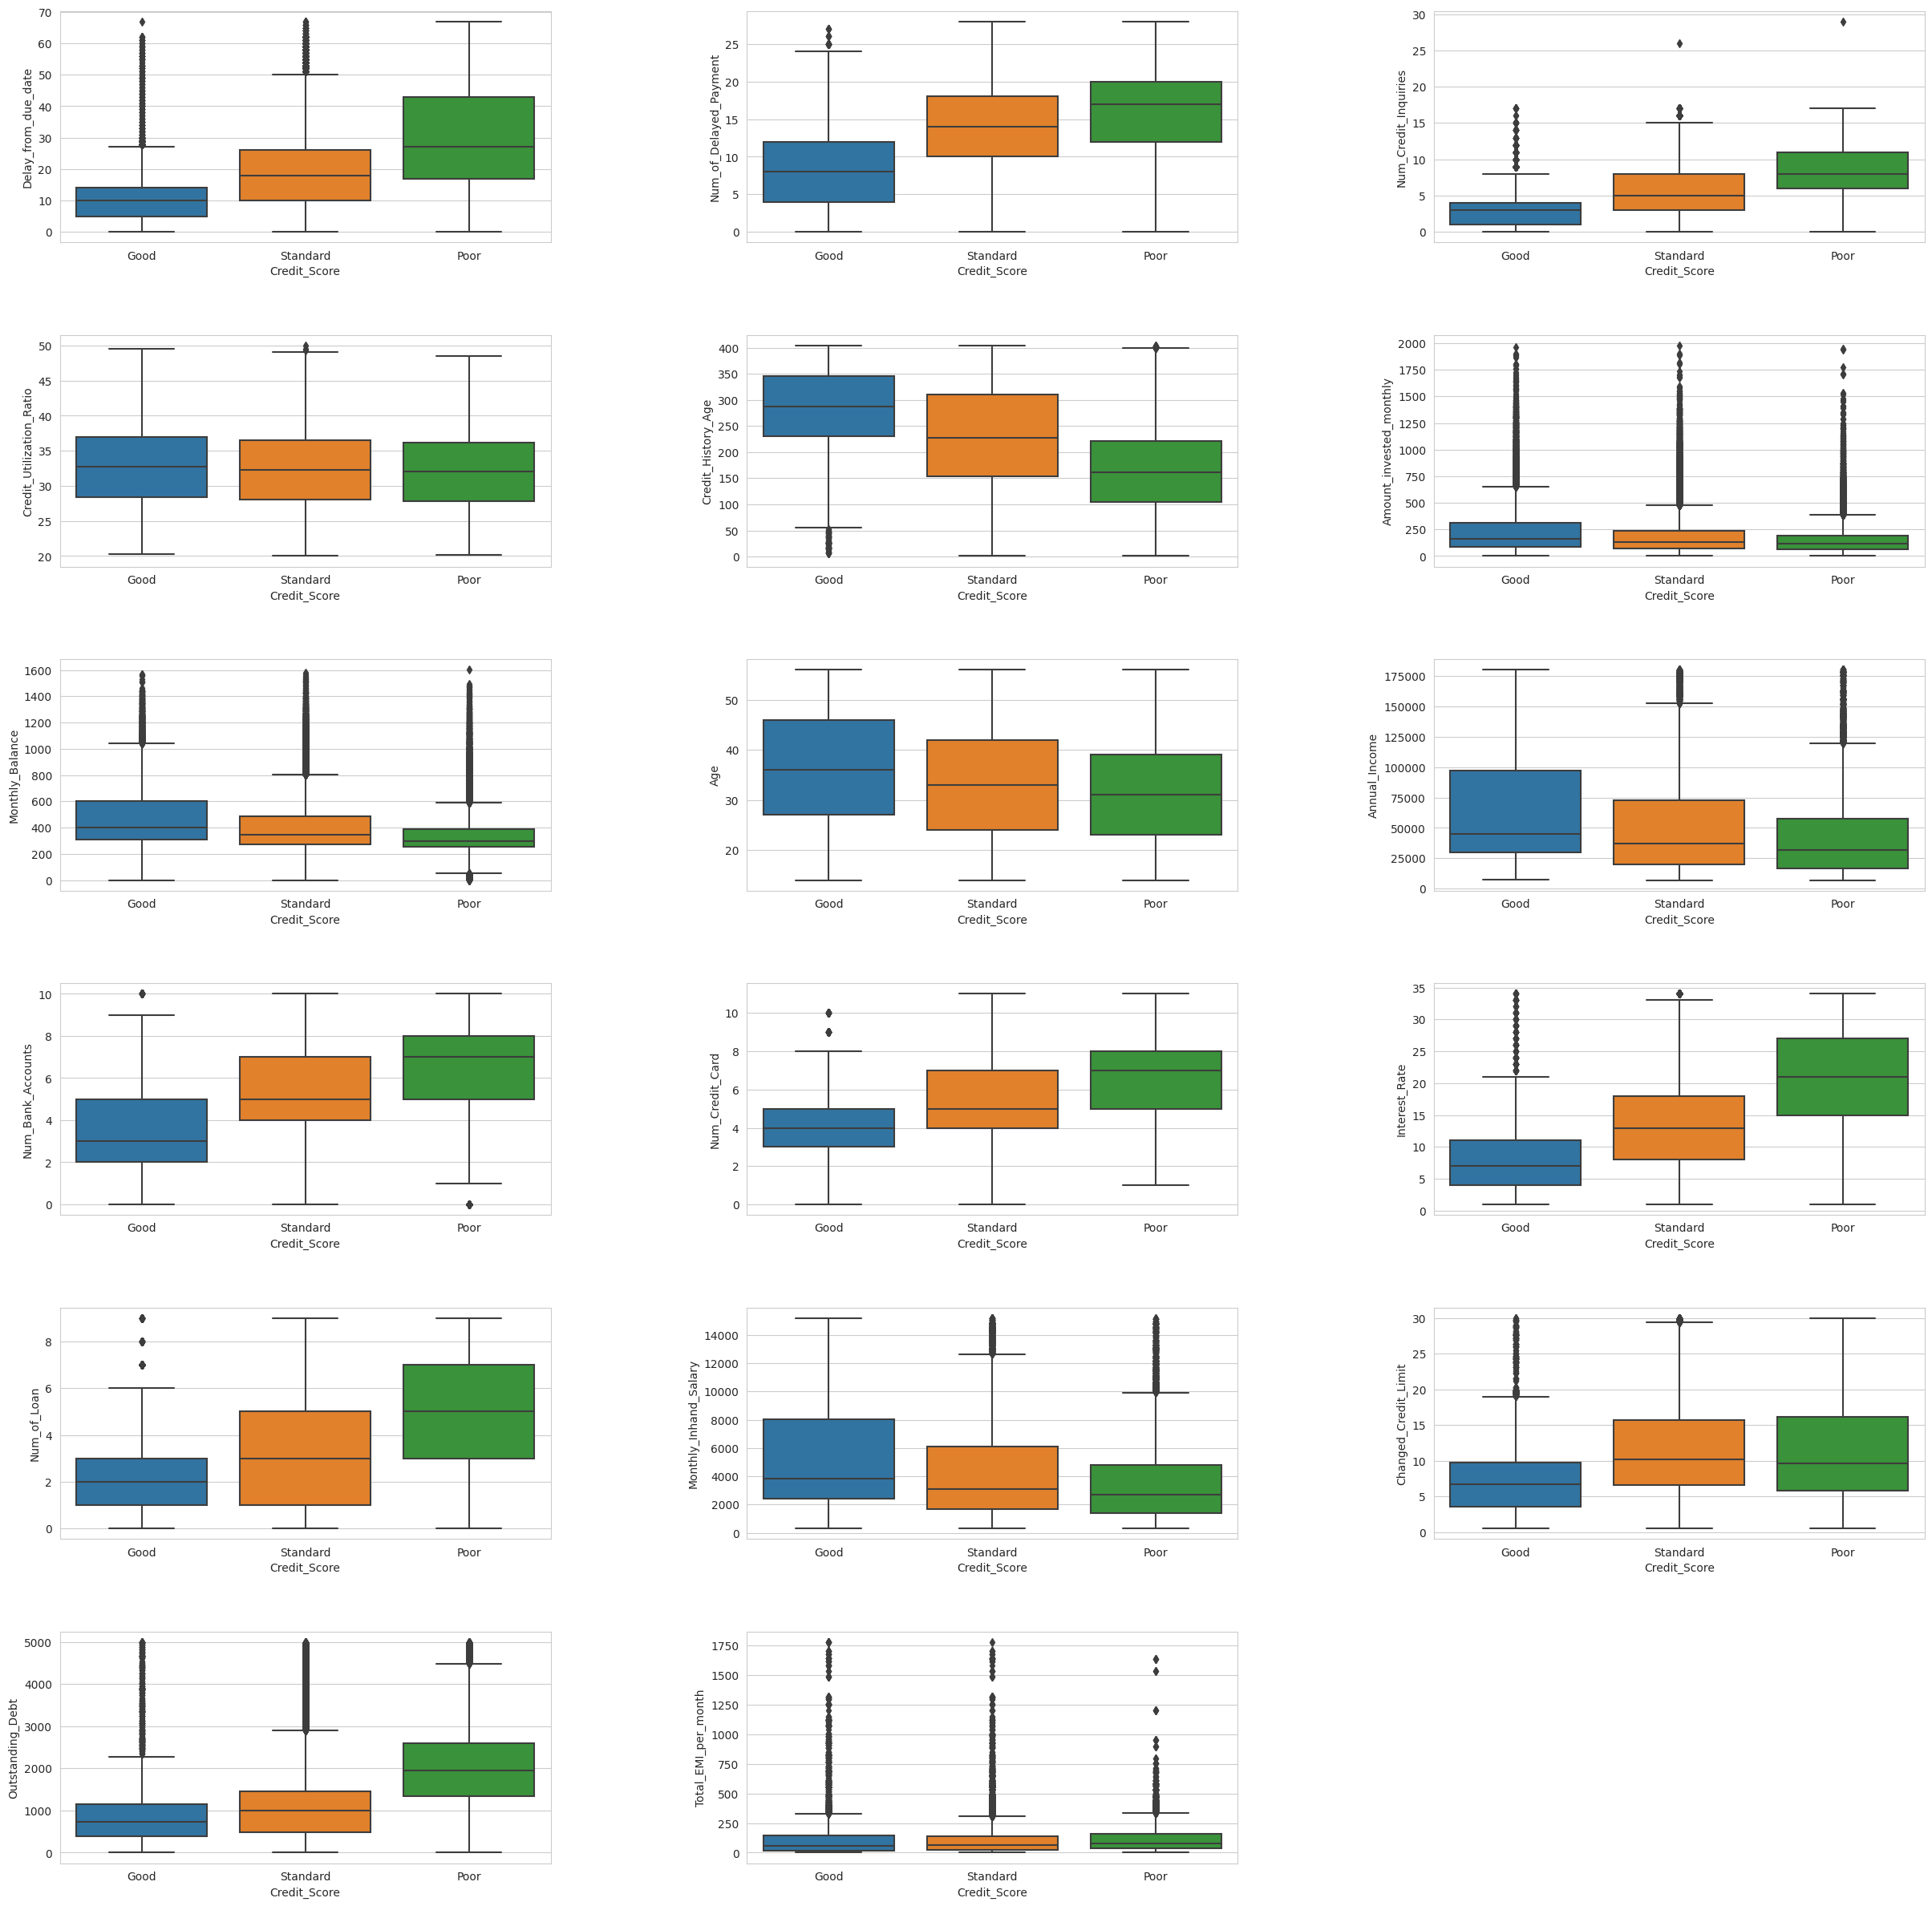

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

index = 0
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for feature in numerical_columns:
    if feature != "Credit_Score":
        index += 1
        plt.subplot(6, 3, index)
        sns.boxplot(x='Credit_Score', y=feature, data=df)
plt.show()

From the 15 box plots above, we can deduce the following:

The more someone earns anually, the better their credit score is

Similar to annual income, a higher monthly in-hand salary leads to a better credit score.

The ideal number of bank accounts is 2 - 4. Having more than 5 negatively affects your credit score.

Similar to bank accounts, having more than 5 credit cards will negatively affect your credit scores. The ideal number is 3-5.

4 - 11% is the sweet spot for average instest rate. Anything above 15% is a no-no.

Take 1-3 loans at a time inorder to keep a good credit score. Having more than 3 loans negatively impacts credtit
scores.

To maintain a good credit score, you have a 5-14 day delay window. Delaying for more than 17 days affects your credit score negatively.

Delaying 4-12 payments from the due date is the safety window. Anything above 12 payments negatively affexts credit scores.

An outstanding debt of
1150 will not affect your credit scores, but going above $1338 affects your credit scores negatively.
Your credit utilization ratio doesn’t affect your credit scores.

Having a long credit history results in better credit scores.

The number of EMIs you are paying in a month doesn’t affect credit scores that much.

How much you invest monthly doesn’t really affect your credit scores.

Having a high monthly balance in your account at the end of the month is good for your credit scores.

Credit scores tend to improve with an increase in age.
Credit Score Classification Model

The Credit_Mix column is valuable for determining credit scores as it tells about the types of credits and loans you have taken.

Since the column is categorical, let's transform it into a numerical feature so that we can use it to train a Machine Learning model for the task of credit score classification:

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
df = pd.get_dummies(df, columns=['Payment_of_Min_Amount'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df["credit_score"]=lb.fit_transform(df["Credit_Score"])

In [ ]:
l=LabelEncoder()
df["Payment_Behaviour"]=l.fit_transform(df["Payment_Behaviour"])

In [ ]:
lc=LabelEncoder()
df["Credit_Mix"]=lc.fit_transform(df["Credit_Mix"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Delay_from_due_date        99960 non-null  float64
 1   Num_of_Delayed_Payment     99960 non-null  float64
 2   Num_Credit_Inquiries       99960 non-null  float64
 3   Credit_Utilization_Ratio   99960 non-null  float64
 4   Credit_History_Age         99960 non-null  float64
 5   Amount_invested_monthly    99960 non-null  float64
 6   Monthly_Balance            99960 non-null  float64
 7   Credit_Score               99960 non-null  object 
 8   Credit_Mix                 99960 non-null  int64  
 9   Payment_Behaviour          99960 non-null  int64  
 10  Age                        99960 non-null  float64
 11  Annual_Income              99960 non-null  float64
 12  Num_Bank_Accounts          99960 non-null  float64
 13  Num_Credit_Card            99960 non-null  flo

In [ ]:
df.credit__score.value_counts()

2    53149
1    28988
0    17823
Name: credit__score, dtype: int64

In [ ]:
df.drop("Credit_Score",axis=1,inplace=True)

In [ ]:
df_drop = df.copy()

In [ ]:
#df = df_e

In [ ]:
#df_e =df.copy()

In [ ]:
import scipy.stats as stats

In [ ]:
# Create a contingency table for each categorical column
table={}
for col in df.columns:
    contingency_table = pd.crosstab(df[col], df['credit_score'])
    # Apply the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test results for {col}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}\n")
    table[col]={"Chi-square":chi2,"P":p}
    # print(f"Expected frequencies table:\n{expected}\n")

Chi-square test results for Delay_from_due_date:
Chi-square statistic: 24587.479292674434
P-value: 0.0
Degrees of freedom: 134

Chi-square test results for Num_of_Delayed_Payment:
Chi-square statistic: 18833.720246285116
P-value: 0.0
Degrees of freedom: 56

Chi-square test results for Num_Credit_Inquiries:
Chi-square statistic: 22435.63244887282
P-value: 0.0
Degrees of freedom: 38

Chi-square test results for Credit_Utilization_Ratio:
Chi-square statistic: 199919.99999999994
P-value: 0.49831757616195477
Degrees of freedom: 199918

Chi-square test results for Credit_History_Age:
Chi-square statistic: 18706.81743379459
P-value: 0.0
Degrees of freedom: 806

Chi-square test results for Amount_invested_monthly:
Chi-square statistic: 194014.423938624
P-value: 3.075556521646969e-46
Degrees of freedom: 185220

Chi-square test results for Monthly_Balance:
Chi-square statistic: 198932.11063138364
P-value: 0.04006456614110191
Degrees of freedom: 197830

Chi-square test results for Credit_Mix:
Chi

In [ ]:
for col, values in table.items():
    if values['P']>0.05:
        print(f"{col}:\nChi-square: {values['Chi-square']}      P-value: {values['P']:<20}\n")

Credit_Utilization_Ratio:
Chi-square: 199919.99999999994      P-value: 0.49831757616195477 



since p value is >0.05 significance level we are dropping this column



In [ ]:
df.drop(["Credit_Utilization_Ratio"],axis=1,inplace=True)


In [ ]:
# Example using pandas get_dummies for one-hot encoding
#df = pd.get_dummies(df, columns=['Payment_of_Min_Amount','Payment_Behaviour'], drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Delay_from_due_date        99960 non-null  float64
 1   Num_of_Delayed_Payment     99960 non-null  float64
 2   Num_Credit_Inquiries       99960 non-null  float64
 3   Credit_History_Age         99960 non-null  float64
 4   Amount_invested_monthly    99960 non-null  float64
 5   Monthly_Balance            99960 non-null  float64
 6   Credit_Mix                 99960 non-null  int64  
 7   Payment_Behaviour          99960 non-null  int64  
 8   Age                        99960 non-null  float64
 9   Annual_Income              99960 non-null  float64
 10  Num_Bank_Accounts          99960 non-null  float64
 11  Num_Credit_Card            99960 non-null  float64
 12  Interest_Rate              99960 non-null  float64
 13  Num_of_Loan                99960 non-null  flo

In [ ]:
# Assume df is your DataFrame
#df = df.astype({ 'Payment_of_Min_Amount_No': 'int', 'Payment_of_Min_Amount_Yes': 'int',
                'Payment_Behaviour_High_spent_Medium_value_payments': 'int',
                'Payment_Behaviour_High_spent_Small_value_payments': 'int', 'Payment_Behaviour_Low_spent_Large_value_payments': 'int',
                'Payment_Behaviour_Low_spent_Medium_value_payments': 'int', 'Payment_Behaviour_Low_spent_Small_value_payments': 'int'})
                 #'Credit_Mix_Good': 'int', 'Credit_Mix_Standard': 'int'})

# Check the data types after conversion
#print(df.dtypes)


In [ ]:
# Create new column by dividing 'Annual_Income' by 'Total_EMI_per_month'
#df['Income_to_EMI_Ratio'] = df['Annual_Income'] / df['Total_EMI_per_month']

# Drop the original 'Annual_Income' and 'Total_EMI_per_month' columns
#df.drop(['Annual_Income', 'Total_EMI_per_month'], axis=1, inplace=True)



In [ ]:
# Assume df is your DataFrame

# Identify numeric columns
#numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude the non-numeric columns that you don't want to scale
#columns_to_exclude = ['Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes', 'Payment_of_Min_Amount_Yes']
#numeric_columns = [col for col in numeric_columns if col not in columns_to_exclude]
#numeric_columns = sorted(numeric_columns)
#numeric_columns



In [ ]:
df['Payment_of_Min_Amount_No'] = df['Payment_of_Min_Amount_No'].astype(int)
df['Payment_of_Min_Amount_Yes'] = df['Payment_of_Min_Amount_Yes'].astype(int)
df['Payment_of_Min_Amount_NM'] = df['Payment_of_Min_Amount_NM'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Delay_from_due_date        99960 non-null  float64
 1   Num_of_Delayed_Payment     99960 non-null  float64
 2   Num_Credit_Inquiries       99960 non-null  float64
 3   Credit_History_Age         99960 non-null  float64
 4   Amount_invested_monthly    99960 non-null  float64
 5   Monthly_Balance            99960 non-null  float64
 6   Credit_Mix                 99960 non-null  int64  
 7   Payment_Behaviour          99960 non-null  int64  
 8   Age                        99960 non-null  float64
 9   Annual_Income              99960 non-null  float64
 10  Num_Bank_Accounts          99960 non-null  float64
 11  Num_Credit_Card            99960 non-null  float64
 12  Interest_Rate              99960 non-null  float64
 13  Num_of_Loan                99960 non-null  flo

Preprocessing of Data

Modelling & Model Performance

without Scaling

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.optimizers import Adam


In [ ]:
X = df.drop('credit_score', axis=1)
y = df['credit_score']

In [ ]:
X.isna().sum()

Delay_from_due_date          0
Num_of_Delayed_Payment       0
Num_Credit_Inquiries         0
Credit_History_Age           0
Amount_invested_monthly      0
Monthly_Balance              0
Credit_Mix                   0
Payment_Behaviour            0
Age                          0
Annual_Income                0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Monthly_Inhand_Salary        0
Changed_Credit_Limit         0
Outstanding_Debt             0
Total_EMI_per_month          0
Payment_of_Min_Amount_NM     0
Payment_of_Min_Amount_No     0
Payment_of_Min_Amount_Yes    0
dtype: int64

In [ ]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=20)

In [ ]:
# Define custom F1 score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight('true_positives', initializer='zeros')
        self.false_positives = self.add_weight('false_positives', initializer='zeros')
        self.false_negatives = self.add_weight('false_negatives', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = K.cast(y_true, dtype=tf.float32)
        y_pred = K.cast(K.round(y_pred), dtype=tf.float32)

        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        false_positives = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)))
        false_negatives = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))

        self.true_positives.assign_add(true_positives)
        self.false_positives.assign_add(false_positives)
        self.false_negatives.assign_add(false_negatives)

    def result(self):
        precision = self.true_positives / (self.true_positives + self.false_positives + K.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + K.epsilon())

        f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
        return f1

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import Precision, Recall
import tensorflow as tf
from keras.utils import to_categorical
from keras import backend as K


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Delay_from_due_date        99960 non-null  float64
 1   Num_of_Delayed_Payment     99960 non-null  float64
 2   Num_Credit_Inquiries       99960 non-null  float64
 3   Credit_History_Age         99960 non-null  float64
 4   Amount_invested_monthly    99960 non-null  float64
 5   Monthly_Balance            99960 non-null  float64
 6   Credit_Mix                 99960 non-null  int64  
 7   Payment_Behaviour          99960 non-null  int64  
 8   Age                        99960 non-null  float64
 9   Annual_Income              99960 non-null  float64
 10  Num_Bank_Accounts          99960 non-null  float64
 11  Num_Credit_Card            99960 non-null  float64
 12  Interest_Rate              99960 non-null  float64
 13  Num_of_Loan                99960 non-null  flo

In [ ]:
# We have 3 classes. We will use F1 score as our metric.




# Model architecture
number_of_classes = 3
input_dimension = X_train.shape[1]

model = Sequential()
model.add(Dense(128, activation="relu", input_dim=input_dimension))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(number_of_classes, activation='softmax'))

# Compile the model with the custom F1 score metric
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=[F1Score()])

from keras.utils import to_categorical

# Assuming y_train is your original target labels
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)

# Fit the model
model.fit(x=X_train,
          y=y_train_one_hot,
          validation_split=0.2,
          batch_size=32,
          epochs=500,
          verbose=1,
          callbacks=early_stop)


Epoch 1/500
2250/2250 [==============================] - 13s 5ms/step - loss: 15.9335 - f1_score: 0.4561 - val_loss: 0.9798 - val_f1_score: 0.4761
Epoch 2/500
2250/2250 [==============================] - 10s 4ms/step - loss: 1.0305 - f1_score: 0.5109 - val_loss: 0.9119 - val_f1_score: 0.5370
Epoch 3/500
2250/2250 [==============================] - 10s 4ms/step - loss: 1.1391 - f1_score: 0.5152 - val_loss: 1.5365 - val_f1_score: 0.3285
Epoch 4/500
2250/2250 [==============================] - 11s 5ms/step - loss: 0.9399 - f1_score: 0.5329 - val_loss: 0.9153 - val_f1_score: 0.5571
Epoch 5/500
2250/2250 [==============================] - 9s 4ms/step - loss: 0.9983 - f1_score: 0.5323 - val_loss: 1.0014 - val_f1_score: 0.5325
Epoch 6/500
2250/2250 [==============================] - 10s 5ms/step - loss: 1.0029 - f1_score: 0.5315 - val_loss: 1.0018 - val_f1_score: 0.5325
Epoch 7/500
2250/2250 [==============================] - 11s 5ms/step - loss: 1.0029 - f1_score: 0.5304 - val_loss: 1.0014 -

KeyboardInterrupt: 

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight = dict(zip(np.unique(y_train), class_weights))


In [ ]:
class_weight

{0: 1.1494499597531527, 1: 0.6269180917339131, 2: 1.8694595100056106}

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

number_of_classes = 3
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)


In [ ]:
y_train_one_hot


array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
# Model architecture class weights
number_of_classes = 3
input_dimension = X_train.shape[1]

model = Sequential()
model.add(Dense(64, activation="relu", input_dim=input_dimension))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(number_of_classes, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=[F1Score()])


# Fit the model with class weights
# Fit the model with automatic class weights balancing
model.fit(x=X_train,
          y=y_train_one_hot,
          validation_split=0.1,
          batch_size=32,
          epochs=200,
          verbose=1,
          #callbacks=early_stop,
          class_weight=None)



Epoch 1/200
2531/2531 [==============================] - 16s 5ms/step - loss: 0.8432 - f1_score: 0.5681 - val_loss: 0.7870 - val_f1_score: 0.6165
Epoch 2/200
2531/2531 [==============================] - 14s 5ms/step - loss: 0.7867 - f1_score: 0.6056 - val_loss: 1.0176 - val_f1_score: 0.5073
Epoch 3/200
2531/2531 [==============================] - 13s 5ms/step - loss: 0.7771 - f1_score: 0.6128 - val_loss: 0.8038 - val_f1_score: 0.6206
Epoch 4/200
2531/2531 [==============================] - 14s 5ms/step - loss: 0.7700 - f1_score: 0.6172 - val_loss: 0.8920 - val_f1_score: 0.5842
Epoch 5/200
2531/2531 [==============================] - 14s 5ms/step - loss: 0.7643 - f1_score: 0.6226 - val_loss: 0.9569 - val_f1_score: 0.6239
Epoch 6/200
2531/2531 [==============================] - 13s 5ms/step - loss: 0.7568 - f1_score: 0.6276 - val_loss: 1.1516 - val_f1_score: 0.5064
Epoch 7/200
2531/2531 [==============================] - 14s 5ms/step - loss: 0.7520 - f1_score: 0.6297 - val_loss: 1.1245 -

In [ ]:
# Model architecture class weights
number_of_classes = 3
input_dimension = X_train.shape[1]

model = Sequential()
model.add(Dense(64, activation="relu", input_dim=input_dimension))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(number_of_classes, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=[F1Score()])


# Fit the model with class weights
# Fit the model with automatic class weights balancing
model.fit(x=X_train,
          y=y_train_one_hot,
          validation_split=0.1,
          batch_size=32,
          epochs=200,
          verbose=1,

          class_weight=None)


Epoch 1/200
2531/2531 [==============================] - 16s 6ms/step - loss: 0.8648 - f1_score: 0.5614 - val_loss: 1.2290 - val_f1_score: 0.4054
Epoch 2/200
2531/2531 [==============================] - 14s 6ms/step - loss: 0.7952 - f1_score: 0.6050 - val_loss: 1.2427 - val_f1_score: 0.3510
Epoch 3/200
2531/2531 [==============================] - 15s 6ms/step - loss: 0.7821 - f1_score: 0.6099 - val_loss: 0.9956 - val_f1_score: 0.5773
Epoch 4/200
2531/2531 [==============================] - 19s 8ms/step - loss: 0.7749 - f1_score: 0.6129 - val_loss: 0.9908 - val_f1_score: 0.5792
Epoch 5/200
2531/2531 [==============================] - 12s 5ms/step - loss: 0.7670 - f1_score: 0.6187 - val_loss: 1.3705 - val_f1_score: 0.4237
Epoch 6/200
2531/2531 [==============================] - 12s 5ms/step - loss: 0.7614 - f1_score: 0.6221 - val_loss: 1.3569 - val_f1_score: 0.4394
Epoch 7/200
2531/2531 [==============================] - 12s 5ms/step - loss: 0.7596 - f1_score: 0.6220 - val_loss: 0.8584 -

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=30)

In [ ]:
# Model architecture class weights
number_of_classes = 3
input_dimension = X_train.shape[1]

model = Sequential()
model.add(Dense(64, activation="relu", input_dim=input_dimension))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(number_of_classes, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=[F1Score()])


# Fit the model with class weights
# Fit the model with automatic class weights balancing
model.fit(x=X_train,
          y=y_train_one_hot,
          validation_split=0.1,
          batch_size=32,
          epochs=200,
          verbose=1,

          class_weight=None)


Epoch 1/200
2531/2531 [==============================] - 16s 5ms/step - loss: 0.8682 - f1_score: 0.5561 - val_loss: 1.2659 - val_f1_score: 0.5261
Epoch 2/200
2531/2531 [==============================] - 13s 5ms/step - loss: 0.7968 - f1_score: 0.5969 - val_loss: 0.8961 - val_f1_score: 0.6120
Epoch 3/200
2531/2531 [==============================] - 13s 5ms/step - loss: 0.7815 - f1_score: 0.6070 - val_loss: 0.9911 - val_f1_score: 0.5417
Epoch 4/200
2531/2531 [==============================] - 13s 5ms/step - loss: 0.7724 - f1_score: 0.6108 - val_loss: 0.8090 - val_f1_score: 0.6132
Epoch 5/200
2531/2531 [==============================] - 13s 5ms/step - loss: 0.7679 - f1_score: 0.6135 - val_loss: 1.0012 - val_f1_score: 0.3797
Epoch 6/200
2531/2531 [==============================] - 13s 5ms/step - loss: 0.7622 - f1_score: 0.6183 - val_loss: 1.5111 - val_f1_score: 0.2774
Epoch 7/200
2531/2531 [==============================] - 13s 5ms/step - loss: 0.7581 - f1_score: 0.6212 - val_loss: 0.8877 -

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=30)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
number_of_classes = 3
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)

In [ ]:
# Model architecture class weights
number_of_classes = 3
input_dimension = X_train.shape[1]

model = Sequential()
model.add(Dense(64, activation="relu", input_dim=input_dimension))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(number_of_classes, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=[F1Score()])


# Fit the model with class weights
# Fit the model with automatic class weights balancing
model.fit(x=X_train,
          y=y_train_one_hot,
          validation_split=0.1,
          batch_size=64,
          epochs=200,
          verbose=1,
          #callbacks=early_stop,
          class_weight=None)


Epoch 1/200
1266/1266 [==============================] - 13s 8ms/step - loss: 0.8729 - f1_score: 0.5509 - val_loss: 1.1993 - val_f1_score: 0.4858
Epoch 2/200
1266/1266 [==============================] - 9s 7ms/step - loss: 0.7883 - f1_score: 0.6057 - val_loss: 0.8563 - val_f1_score: 0.5766
Epoch 3/200
1266/1266 [==============================] - 9s 7ms/step - loss: 0.7687 - f1_score: 0.6193 - val_loss: 0.7969 - val_f1_score: 0.5680
Epoch 4/200
1266/1266 [==============================] - 8s 7ms/step - loss: 0.7633 - f1_score: 0.6193 - val_loss: 0.7466 - val_f1_score: 0.6438
Epoch 5/200
1266/1266 [==============================] - 9s 7ms/step - loss: 0.7579 - f1_score: 0.6210 - val_loss: 0.7657 - val_f1_score: 0.6241
Epoch 6/200
1266/1266 [==============================] - 9s 7ms/step - loss: 0.7523 - f1_score: 0.6256 - val_loss: 0.9625 - val_f1_score: 0.4785
Epoch 7/200
1266/1266 [==============================] - 8s 6ms/step - loss: 0.7484 - f1_score: 0.6304 - val_loss: 0.8657 - val_f

In [ ]:
# Model architecture class weights
number_of_classes = 3
input_dimension = X_train.shape[1]

model = Sequential()
model.add(Dense(64, activation="relu", input_dim=input_dimension))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(number_of_classes, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=[F1Score()])


# Fit the model with class weights
# Fit the model with automatic class weights balancing
model.fit(x=X_train,
          y=y_train_one_hot,
          validation_split=0.1,
          batch_size=64,
          epochs=200,
          verbose=1,
          #callbacks=early_stop,
          class_weight=None)


Epoch 1/200
1266/1266 [==============================] - 12s 8ms/step - loss: 0.8656 - f1_score: 0.5571 - val_loss: 0.8529 - val_f1_score: 0.5536
Epoch 2/200
1266/1266 [==============================] - 10s 8ms/step - loss: 0.7859 - f1_score: 0.6048 - val_loss: 1.0272 - val_f1_score: 0.5646
Epoch 3/200
1266/1266 [==============================] - 10s 8ms/step - loss: 0.7663 - f1_score: 0.6179 - val_loss: 1.1340 - val_f1_score: 0.3476
Epoch 4/200
1266/1266 [==============================] - 8s 6ms/step - loss: 0.7598 - f1_score: 0.6209 - val_loss: 0.9311 - val_f1_score: 0.5987
Epoch 5/200
1266/1266 [==============================] - 10s 8ms/step - loss: 0.7535 - f1_score: 0.6247 - val_loss: 0.8224 - val_f1_score: 0.5908
Epoch 6/200
1266/1266 [==============================] - 9s 7ms/step - loss: 0.7508 - f1_score: 0.6278 - val_loss: 0.8548 - val_f1_score: 0.4830
Epoch 7/200
1266/1266 [==============================] - 8s 7ms/step - loss: 0.7492 - f1_score: 0.6308 - val_loss: 1.1436 - va

<Axes: >

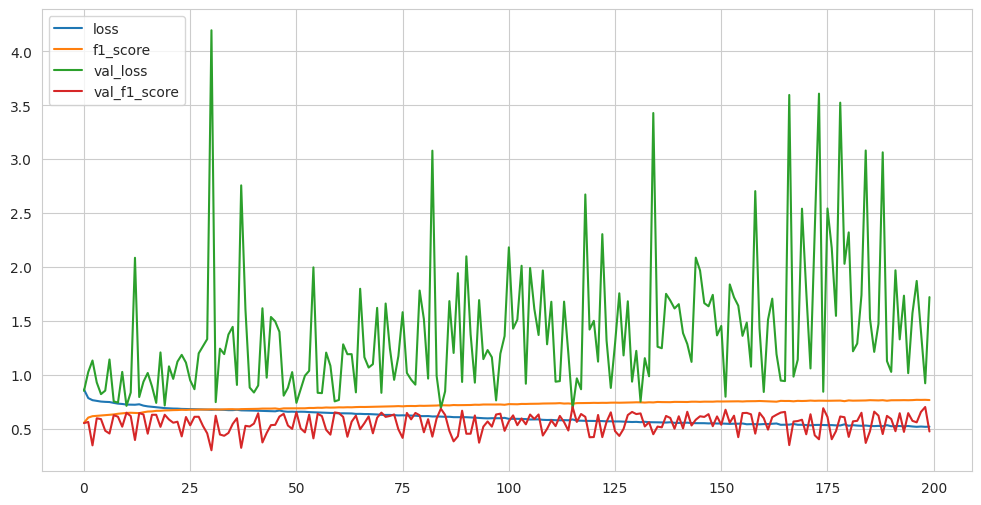

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
# Predictions for multiclass classification
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Use y_test directly if it's not one-hot encoded
print(classification_report(y_test, predicted_classes))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.28      0.35      0.31      1782
           1       0.48      0.77      0.59      2899
           2       0.64      0.38      0.48      5315

    accuracy                           0.49      9996
   macro avg       0.47      0.50      0.46      9996
weighted avg       0.53      0.49      0.48      9996



In [ ]:
# Predictions for multiclass classification
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Use y_test directly if it's not one-hot encoded
print(classification_report(y_test, predicted_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.50      0.76      0.60      1782
           1       0.67      0.59      0.63      2899
           2       0.75      0.67      0.71      5315

    accuracy                           0.66      9996
   macro avg       0.64      0.67      0.65      9996
weighted avg       0.68      0.66      0.67      9996



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test).argmax(axis=1)  # Modelin çıktısını sınıflara dönüştür
y_pred = y_pred.astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


313/313 [==============================] - 1s 2ms/step
[[ 798  422  562]
 [ 221 2075  603]
 [ 933 1956 2426]]
              precision    recall  f1-score   support

           0       0.41      0.45      0.43      1782
           1       0.47      0.72      0.56      2899
           2       0.68      0.46      0.54      5315

    accuracy                           0.53      9996
   macro avg       0.52      0.54      0.51      9996
weighted avg       0.57      0.53      0.53      9996



## Scaling the data **

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

number_of_classes = 3
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)

In [ ]:
# Model architecture class weights
number_of_classes = 3
input_dimension = X_train.shape[1]

model = Sequential()
model.add(Dense(64, activation="relu", input_dim=input_dimension))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(number_of_classes, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=[F1Score()])


# Fit the model with class weights
# Fit the model with automatic class weights balancing
model.fit(x=X_train,
          y=y_train_one_hot,
          validation_split=0.1,
          batch_size=32,
          epochs=200,
          verbose=1,

          class_weight=None)


NameError: name 'F1Score' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test).argmax(axis=1)
y_pred = y_pred.astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

313/313 [==============================] - 3s 8ms/step
[[1418    8  356]
 [  24 2391  484]
 [ 542  721 4052]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1782
           1       0.77      0.82      0.79      2899
           2       0.83      0.76      0.79      5315

    accuracy                           0.79      9996
   macro avg       0.77      0.79      0.78      9996
weighted avg       0.79      0.79      0.79      9996



This is the best model among others. Scaling the data made the model perform better.

In [ ]:
# Model architecture class weights
number_of_classes = 3
input_dimension = X_train.shape[1]

model = Sequential()
model.add(Dense(64, activation="relu", input_dim=input_dimension))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(number_of_classes, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=[F1Score()])


# Fit the model with class weights
# Fit the model with automatic class weights balancing
model.fit(x=X_train,
          y=y_train_one_hot,
          validation_split=0.1,
          batch_size=32,
          epochs=500,
          verbose=1,

          class_weight=None)


Epoch 1/500
2531/2531 [==============================] - 15s 5ms/step - loss: 0.7558 - f1_score: 0.6458 - val_loss: 0.6879 - val_f1_score: 0.6780
Epoch 2/500
2531/2531 [==============================] - 13s 5ms/step - loss: 0.6951 - f1_score: 0.6792 - val_loss: 0.6663 - val_f1_score: 0.6832
Epoch 3/500
2531/2531 [==============================] - 12s 5ms/step - loss: 0.6832 - f1_score: 0.6854 - val_loss: 0.6650 - val_f1_score: 0.6962
Epoch 4/500
2531/2531 [==============================] - 13s 5ms/step - loss: 0.6768 - f1_score: 0.6884 - val_loss: 0.6589 - val_f1_score: 0.6984
Epoch 5/500
2531/2531 [==============================] - 13s 5ms/step - loss: 0.6704 - f1_score: 0.6925 - val_loss: 0.6556 - val_f1_score: 0.6984
Epoch 6/500
2531/2531 [==============================] - 14s 5ms/step - loss: 0.6637 - f1_score: 0.6963 - val_loss: 0.6442 - val_f1_score: 0.7037
Epoch 7/500
2531/2531 [==============================] - 13s 5ms/step - loss: 0.6596 - f1_score: 0.6984 - val_loss: 0.6399 -

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

number_of_classes = 3
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)

In [ ]:
# Model architecture class weights
number_of_classes = 3
input_dimension = X_train.shape[1]

model = Sequential()
model.add(Dense(64, activation="relu", input_dim=input_dimension))
model.add(BatchNormalization())
model.add(Dense(64, activation="tanh"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(number_of_classes, activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=[F1Score()])


# Fit the model with class weights
# Fit the model with automatic class weights balancing
model.fit(x=X_train,
          y=y_train_one_hot,
          validation_split=0.1,
          batch_size=128,
          epochs=200,
          verbose=1,

          class_weight=None)


Epoch 1/200
633/633 [==============================] - 13s 13ms/step - loss: 0.7726 - f1_score: 0.6474 - val_loss: 0.6896 - val_f1_score: 0.6803
Epoch 2/200
633/633 [==============================] - 9s 14ms/step - loss: 0.6824 - f1_score: 0.6875 - val_loss: 0.6637 - val_f1_score: 0.6993
Epoch 3/200
633/633 [==============================] - 7s 10ms/step - loss: 0.6657 - f1_score: 0.6981 - val_loss: 0.6524 - val_f1_score: 0.7043
Epoch 4/200
633/633 [==============================] - 9s 14ms/step - loss: 0.6551 - f1_score: 0.7037 - val_loss: 0.6478 - val_f1_score: 0.7092
Epoch 5/200
633/633 [==============================] - 4s 6ms/step - loss: 0.6458 - f1_score: 0.7088 - val_loss: 0.6427 - val_f1_score: 0.7095
Epoch 6/200
633/633 [==============================] - 4s 6ms/step - loss: 0.6347 - f1_score: 0.7137 - val_loss: 0.6377 - val_f1_score: 0.7132
Epoch 7/200
633/633 [==============================] - 4s 7ms/step - loss: 0.6259 - f1_score: 0.7199 - val_loss: 0.6399 - val_f1_score: 0

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test).argmax(axis=1)
y_pred = y_pred.astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

313/313 [==============================] - 1s 2ms/step
[[1260   24  498]
 [  29 2292  578]
 [ 516  672 4127]]
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1782
           1       0.77      0.79      0.78      2899
           2       0.79      0.78      0.78      5315

    accuracy                           0.77      9996
   macro avg       0.75      0.76      0.76      9996
weighted avg       0.77      0.77      0.77      9996

